# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create empty lists to store data for dataframe
city_list = []
latitude = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

In [4]:
#create query url for loop
units = 'metric'
query_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

In [5]:
test_response = requests.get(query_url + 'houston').json()
test_response['main']['temp_max']

29.11

In [6]:
print('Beginning Data Retrieval')
print('-----------------------------')

#create query url for loop
query_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

# loop through cities to collect currect weather data
for city in cities:
    # Create search query, make request and store in json
    response_json = requests.get(query_url + city).json()
    
    # attempt to grab weather data from the cities
    try:
        latitude.append(response_json['coord']['lat'])
        temp.append(response_json['main']['temp'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        city_list.append(city)
        #mass.append(response_json['results'][0]['mass'])
        print(f'Processing Record {cities.index(city)} of Set 1 | {city}')
        
    # exceptions for a cities not found or errors
    except:
        print(f'{city} not found. Skipping.')
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | romny
Processing Record 1 of Set 1 | ponta delgada
attawapiskat not found. Skipping.
Processing Record 3 of Set 1 | machico
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | camopi
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | garcia
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | hermanus
solovetskiy not found. Skipping.
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | aksu
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | aklavik
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | ingham
mys shmidta not found. Skipping.
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | ukiah
Processing

Processing Record 201 of Set 1 | severo-kurilsk
saleaula not found. Skipping.
Processing Record 203 of Set 1 | pimentel
Processing Record 204 of Set 1 | ferme-neuve
Processing Record 205 of Set 1 | mogadishu
Processing Record 206 of Set 1 | north bend
Processing Record 207 of Set 1 | bose
Processing Record 208 of Set 1 | abu dhabi
Processing Record 209 of Set 1 | jizan
Processing Record 210 of Set 1 | makokou
Processing Record 211 of Set 1 | dunedin
Processing Record 212 of Set 1 | nuevo progreso
Processing Record 213 of Set 1 | kilindoni
Processing Record 214 of Set 1 | salalah
Processing Record 215 of Set 1 | talnakh
Processing Record 216 of Set 1 | seoul
Processing Record 217 of Set 1 | boende
tabiauea not found. Skipping.
Processing Record 219 of Set 1 | kulhudhuffushi
Processing Record 220 of Set 1 | pedasi
Processing Record 221 of Set 1 | bundaberg
Processing Record 222 of Set 1 | kodiak
Processing Record 223 of Set 1 | souillac
Processing Record 224 of Set 1 | paragominas
sentya

Processing Record 398 of Set 1 | tshikapa
Processing Record 399 of Set 1 | vangaindrano
Processing Record 400 of Set 1 | khani
Processing Record 401 of Set 1 | krasnoselkup
Processing Record 402 of Set 1 | grindavik
Processing Record 403 of Set 1 | alakurtti
Processing Record 404 of Set 1 | punta alta
Processing Record 405 of Set 1 | sorland
Processing Record 406 of Set 1 | mamontovo
Processing Record 407 of Set 1 | kavaratti
Processing Record 408 of Set 1 | mount gambier
Processing Record 409 of Set 1 | peterhead
Processing Record 410 of Set 1 | korla
Processing Record 411 of Set 1 | saint george
Processing Record 412 of Set 1 | san rafael
Processing Record 413 of Set 1 | jacksonville
Processing Record 414 of Set 1 | ulety
Processing Record 415 of Set 1 | nabire
Processing Record 416 of Set 1 | pevek
Processing Record 417 of Set 1 | corning
Processing Record 418 of Set 1 | ilhabela
Processing Record 419 of Set 1 | labuhan
Processing Record 420 of Set 1 | morros
Processing Record 421 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create DataFrame
weather_data = pd.DataFrame({
    'City': city_list,
    'Latitude': latitude,
    'Temperature (F)': temp,
    'Max Temp (F)': max_temp,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed
})

#set the city to the index
weather_data = weather_data.set_index('City')

#weather_data

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
clean_weather_data = weather_data.loc[(weather_data['Humidity (%)'] < 100),:]

#export clean data to csv
clean_weather_data.to_csv('../Output/clean_weather_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

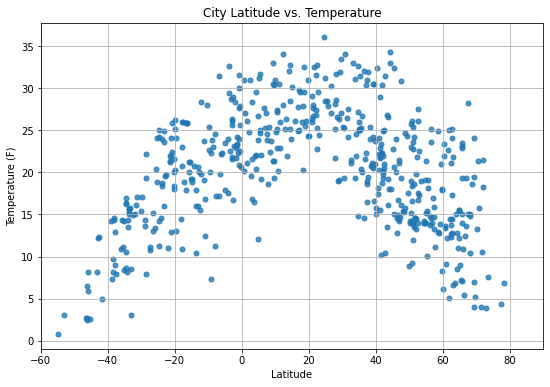

In [16]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Temperature (F)', grid=True, figsize=(9,6),
              title='City Latitude vs. Temperature', s=25, alpha=0.8, xlim=(-60,90))

plt.savefig('../Output/lat_v_temp', pad_inches=0.1, facecolor='w')
plt.show()

## Latitude vs. Humidity Plot

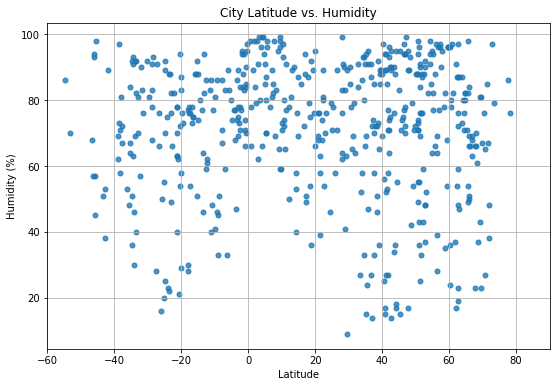

In [17]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Humidity (%)', grid=True, figsize=(9,6),
              title='City Latitude vs. Humidity', s=25, alpha=0.8, xlim=(-60,90))

plt.savefig('../Output/lat_v_humidity', pad_inches=0.1, facecolor='w')
plt.show()

## Latitude vs. Cloudiness Plot

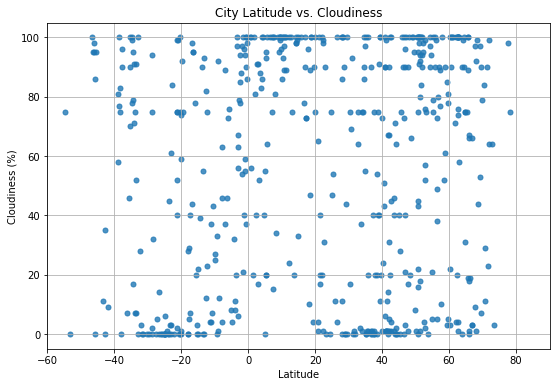

In [18]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', grid=True, figsize=(9,6),
              title='City Latitude vs. Cloudiness', s=25, alpha=0.8, xlim=(-60,90))

plt.savefig('../Output/lat_v_clouds', pad_inches=0.1, facecolor='w')
plt.show()

## Latitude vs. Wind Speed Plot

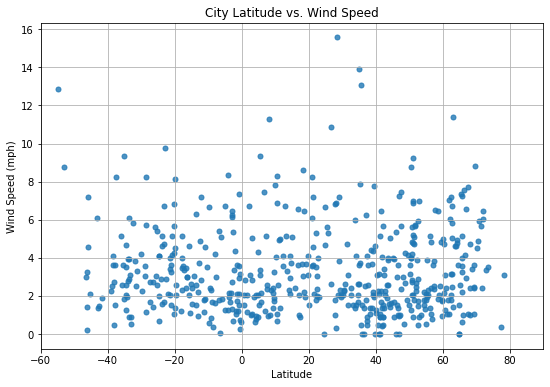

In [19]:
clean_weather_data.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', grid=True, figsize=(9,6),
              title='City Latitude vs. Wind Speed', s=25, alpha=0.8, xlim=(-60,90))

plt.savefig('../Output/lat_v_wind', pad_inches=0.1, facecolor='w')
plt.show()

## Linear Regression

In [ ]:
#create dataframes for Northen and Southern Hemispheres
northern_hemi = clean_weather_data.loc[(clean_weather_data['Latitude'] > 0),:]
southern_hemi = clean_weather_data.loc[(clean_weather_data['Latitude'] < 0),:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression